In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [93]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
train_data = pd.read_csv('train.csv',encoding='latin1');
test_data = pd.read_csv('test.csv',encoding='latin1');

In [94]:
df = pd.concat([train_data,test_data])

In [65]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [67]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

In [69]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

In [70]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

In [71]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

Removing Missing Values

In [72]:
df.dropna(inplace=True)

Sentiment Value COunts

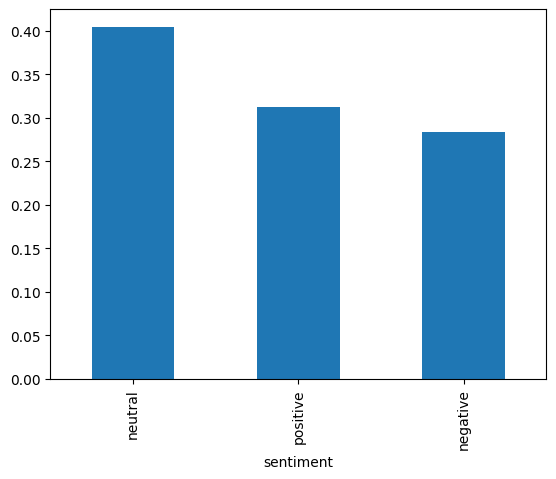

In [73]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [74]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


Convert the sentiment column to categorical data

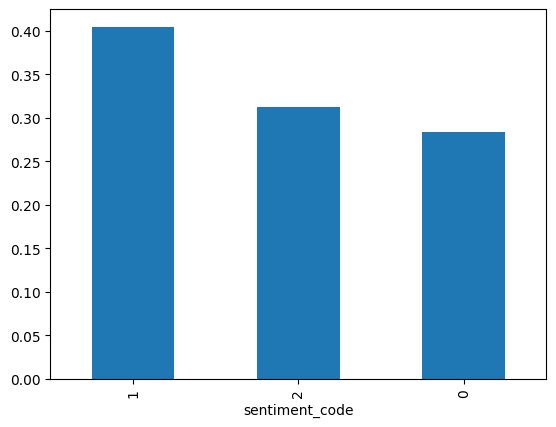

In [75]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

Histplot

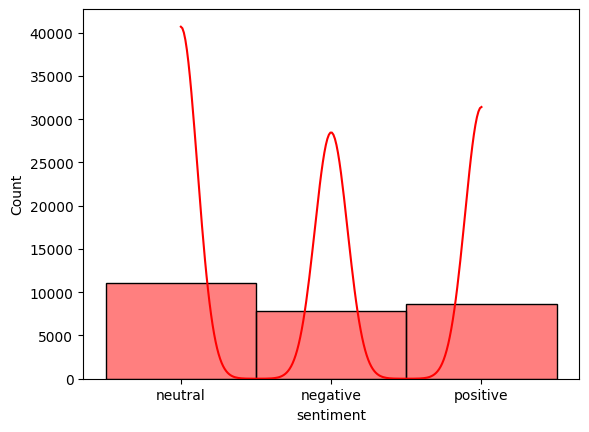

In [76]:
sns.histplot(df['sentiment'], kde=True, color = 'r')
plt.show()

Lancaster stemming

In [77]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


Word frequency distribution

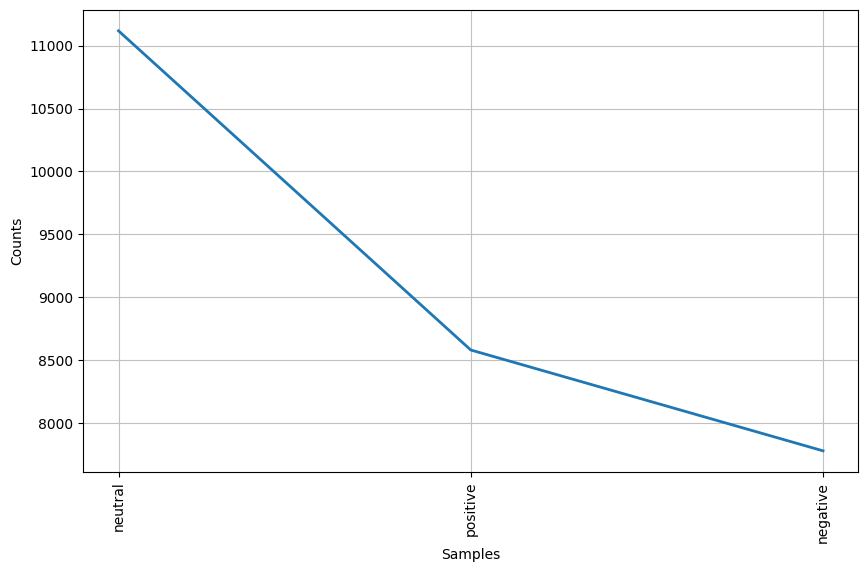

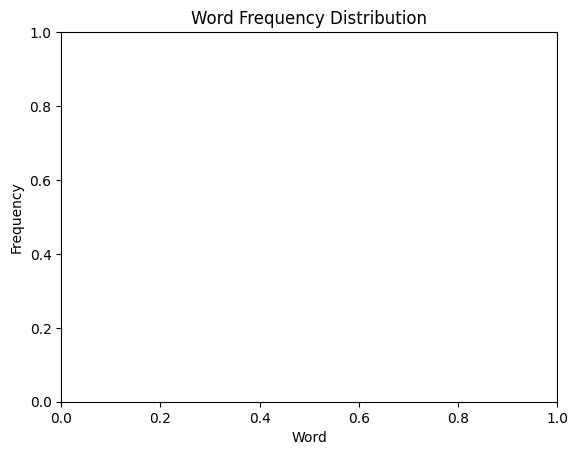

In [78]:
from nltk.probability import FreqDist
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

Convert to strings

In [79]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [80]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

Remove other irrelevant columns

In [81]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

Preprocess the text

In [82]:
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["selected_text"].apply(wp)

Evaluation of dataset

In [83]:
X=df['selected_text']
y= df['sentiment']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


Create tf-idf

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [86]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

Using logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [89]:
pred_lr=lr.predict(XV_test)


In [90]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8286026200873362

In [91]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1572
     neutral       0.79      0.88      0.83      2236
    positive       0.91      0.80      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.83      0.83      0.83      5496



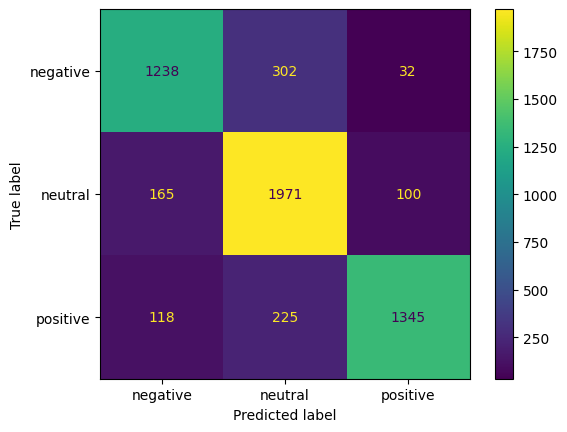

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

In [97]:
# Chatbot Logic
print("Hello! I'm a sentiment analysis chatbot. How are you feeling today?")

while True:
    # Get user input
    user_input = input("You: ")

    # Preprocess the user input
    cleaned_input = remove_unnecessary_characters(user_input)
    cleaned_input = remove_stopwords(cleaned_input)

    # Check if cleaned input is empty
    if not cleaned_input:
        print("Chatbot: I didn't understand that. Could you please rephrase?")
        continue

    # Debugging: Print the cleaned input
    print(f"Cleaned Input: {cleaned_input}")

    # Predict sentiment using the trained model
    try:
        sentiment_vector = vectorization.transform([cleaned_input])
        sentiment = lr.predict(sentiment_vector)[0]
    except Exception as e:
        print(f"Error predicting sentiment: {e}")
        sentiment = "neutral"  # Fallback to neutral if there's an error

    # Debugging: Print the predicted sentiment
    print(f"Predicted Sentiment: {sentiment}")

    # Respond based on sentiment
    if sentiment == "happy":
        response = random.choice(["That's wonderful to hear!", "I'm so glad you're feeling happy!", "Happiness is contagious!"])
    elif sentiment == "sad":
        response = random.choice(["I'm sorry to hear that. What's bothering you?", "Don't worry, things will get better.", "If you need someone to talk to, I'm here for you."])
    elif sentiment == "neutral":
        response = random.choice(["I see. Let me know if you want to talk about anything.", "Neutral is good too. Sometimes it's nice to just be calm and relaxed.", "Neutral is a perfectly valid emotion. No need to feel bad about it."])
    else:
        response = "I'm not sure how to respond to that."

    print("Chatbot:", response)

    # Ask if the user wants to continue
    continue_chat = input("Do you want to continue chatting? (yes/no) ")
    if continue_chat.lower() != "yes":
        print("Goodbye! Have a great day.")
        break

Hello! I'm a sentiment analysis chatbot. How are you feeling today?
You: i am sad
Cleaned Input: sad
Predicted Sentiment: negative
Chatbot: I'm not sure how to respond to that.
Do you want to continue chatting? (yes/no) yes
You: i am feeling very happy
Cleaned Input: feeling happy
Predicted Sentiment: positive
Chatbot: I'm not sure how to respond to that.
Do you want to continue chatting? (yes/no) no
Goodbye! Have a great day.
